In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv("college_student_placement_dataset.csv")

display(df.head())

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB
None


In [4]:
print(df.isnull().sum())

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64


In [5]:
df = df.dropna(axis=1)

In [6]:
df = df.drop("College_ID", axis=1)


In [7]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


In [8]:
df=df.drop( "Extra_Curricular_Score",axis=1)

In [9]:
df=df.drop("Prev_Sem_Result", axis=1)

In [10]:
df.head()

,IQ,CGPA,Academic_Performance,Internship_Experience,Communication_Skills,Projects_Completed,Placement
0,107,6.28,8,No,8,4,No
1,97,5.37,8,No,8,0,No
2,109,5.83,9,No,1,1,No
3,122,5.75,6,Yes,6,1,No
4,96,7.69,7,No,10,2,No


In [11]:
# visualisation section

In [12]:
# sns.scatterplot(data=df, x="CGPA", y="Placement")
# plt.title("Relation between CGPA and Placement")
# plt.show()

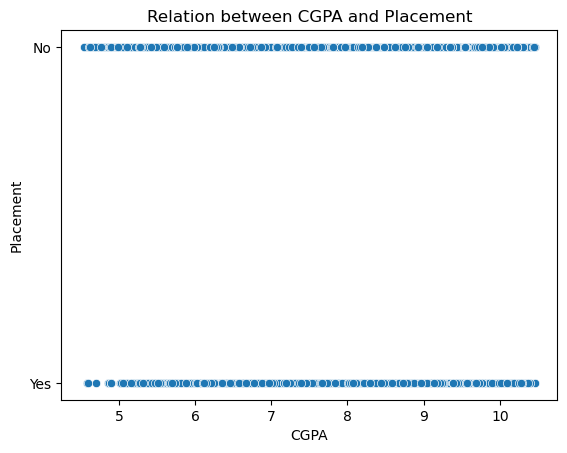

In [13]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="CGPA", y="Placement")
plt.title("Relation between CGPA and Placement")
plt.show()

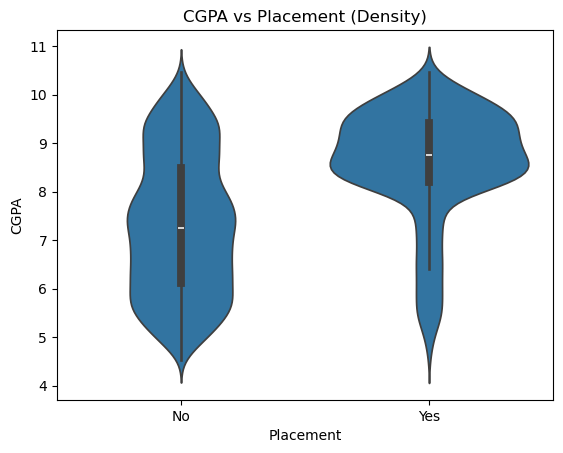

In [14]:
sns.violinplot(data=df, x="Placement", y="CGPA")
plt.title("CGPA vs Placement (Density)")
plt.show()


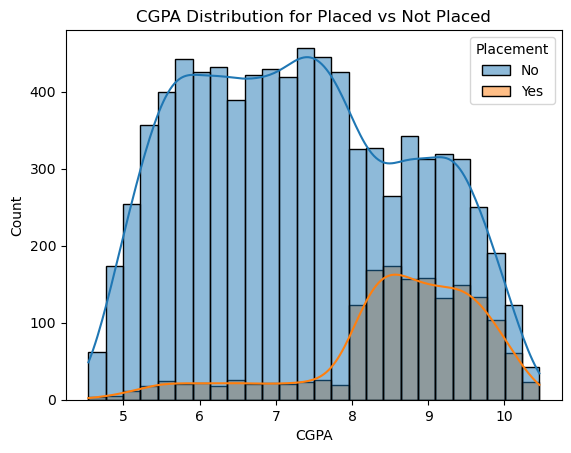

In [15]:
sns.histplot(data=df, x="CGPA", hue="Placement", kde=True)
plt.title("CGPA Distribution for Placed vs Not Placed")
plt.show()

In [16]:
X = df.drop("Placement", axis=1)

In [17]:
X

,IQ,CGPA,Academic_Performance,Internship_Experience,Communication_Skills,Projects_Completed
0,107,6.28,8,No,8,4
1,97,5.37,8,No,8,0
2,109,5.83,9,No,1,1
3,122,5.75,6,Yes,6,1
4,96,7.69,7,No,10,2
...,...,...,...,...,...,...
9995,119,8.29,4,No,8,0
9996,70,9.34,7,No,7,2
9997,89,6.25,3,Yes,9,5
9998,107,8.92,3,No,5,1


In [18]:
Y = df["Placement"]

In [19]:
Y

0        No
1        No
2        No
3        No
4        No
       ... 
9995    Yes
9996     No
9997     No
9998     No
9999     No
Name: Placement, Length: 10000, dtype: object

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


In [22]:
# Machine learning models can’t handle all data types in the same way.
# Different types of data require different preprocessing techniques, so separating them early helps avoid major issues later.

In [23]:
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [25]:
# Preprocessing & Model Pipeline
# ==========================================
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [27]:
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)


In [28]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)


In [29]:
param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['IQ',
                                                                          'CGPA',
                                                                          'Academic_Performance',
                                                                          'Communication_Skills',
                                                                          'Projects_Completed']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Internship_Experience'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [30]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['IQ',
                                                                          'CGPA',
                                                                          'Academic_Performance',
                                                                          'Communication_Skills',
                                                                          'Projects_Completed']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Internship_Experience'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [32]:
print(grid_search.best_params_)

{'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [33]:
best_model = grid_search.best_estimator_

In [34]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['IQ', 'CGPA',
                                                   'Academic_Performance',
                                                   'Communication_Skills',
                                                   'Projects_Completed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Internship_Experience'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [35]:
Y_pred = best_model.predict(X_test)

print("\n Model Evaluation")
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


 Model Evaluation
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      1674
         Yes       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



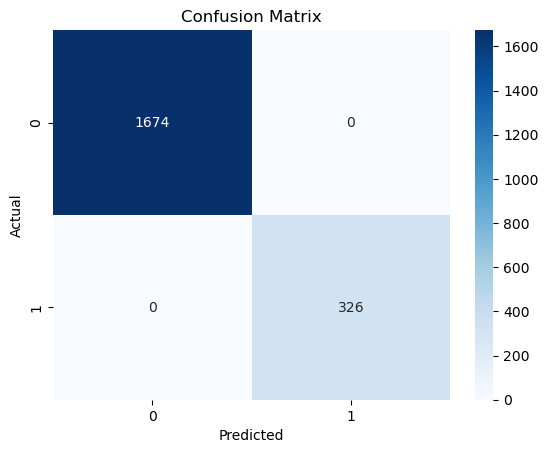

In [40]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [37]:
if len(Y.unique()) == 2:
    print("ROC-AUC:", roc_auc_score(pd.get_dummies(Y_test)["Yes"], pd.get_dummies(Y_pred)["Yes"]))


ROC-AUC: 1.0


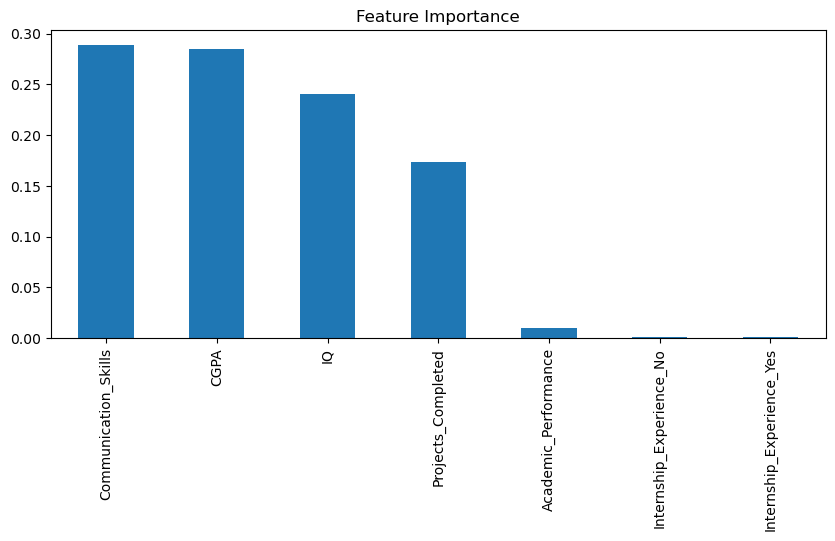

In [38]:
rf_model = best_model.named_steps["classifier"]
if hasattr(rf_model, "feature_importances_"):
    feature_names = numeric_features + list(
        best_model.named_steps["preprocessor"]
        .named_transformers_["cat"]
        .get_feature_names_out(categorical_features)
    )
    importances = pd.Series(rf_model.feature_importances_, index=feature_names)
    importances.sort_values(ascending=False).plot(kind="bar", figsize=(10, 4))
    plt.title("Feature Importance")
    plt.show()


In [41]:
import joblib

# Save the trained best model
joblib.dump(best_model, "Finalmodel.pkl")
print("✅ Model saved successfully!")


✅ Model saved successfully!
